# Dataset loading and preprocessing

In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("pnd_training_dataset.csv")  

print(df.head())
print(df.info())
print(df.describe())

df.dropna(inplace=True)

x = df.drop(columns=["gt", "symbol", "date","pump_index"])  
y = df["gt"] 


scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


                  date  pump_index  std_rush_order  avg_rush_order  \
0  2018-12-29 17:00:25           0          -0.001          -0.005   
1  2018-12-29 17:01:40           0           0.000           0.000   
2  2018-12-29 17:02:05           0           0.000           0.000   
3  2018-12-29 17:25:00           0           0.000           0.000   
4  2018-12-29 17:35:50           0           0.000           0.000   

   std_trades  std_volume  avg_volume  std_price  avg_price  avg_price_max  \
0         0.0       0.000      -0.000       -0.0     -0.001         -0.001   
1         0.0       0.000      -0.000       -0.0     -0.001         -0.001   
2         0.0      -0.000      -0.002       -0.0     -0.001         -0.001   
3         0.0      -0.001      -0.004       -0.0      0.000          0.000   
4        -0.0      -0.000       0.000       -0.0      0.000          0.000   

   hour_sin  hour_cos  minute_sin  minute_cos symbol  gt  
0    -0.998    -0.068       0.000       1.000    BR

# Model training

In [2]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation and cross validation

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1_macro')
print(f"F1 Macro Scores for each fold: {cv_scores}")
print(f"Average F1 Macro Score: {np.mean(cv_scores)}")

Confusion Matrix:
[[377314     10]
 [    23    167]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    377324
           1       0.94      0.88      0.91       190

    accuracy                           1.00    377514
   macro avg       0.97      0.94      0.96    377514
weighted avg       1.00      1.00      1.00    377514

F1 Macro Scores for each fold: [0.98127415 0.97137573 0.9673754  0.92071284 0.92384681]
Average F1 Macro Score: 0.9529169861268982


# Feature importance graphs

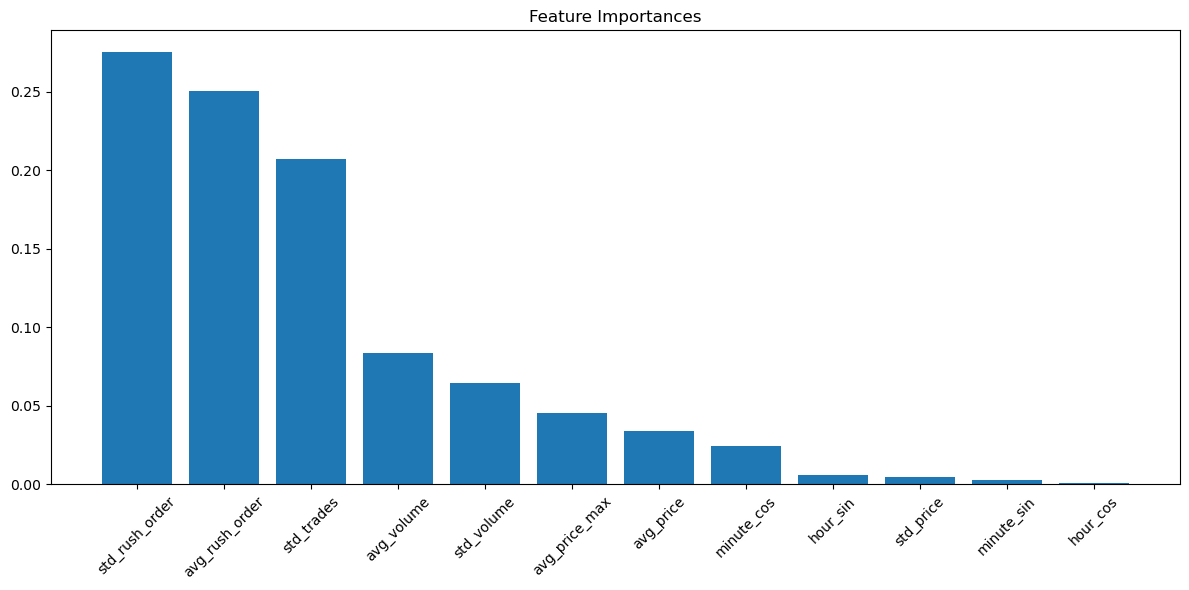

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# Get feature importances from the model

features = x.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), feature_names, rotation=45)
plt.tight_layout()
plt.show()

# Loading the model into a pickle file 

In [5]:
import pickle 

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
